In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pipeline import LBP_3DT
import pickle

In [3]:
mapping=pd.read_csv('../Datasets/XV Clinical Data/WCH_XV_genotypes.csv')
mapping.columns=['Record ID','Condition']
mapping=dict(zip(mapping['Record ID'],mapping['Condition']))


csv_dir = '../Datasets/XV Clinical Data'
csv_files = [fold for fold in os.listdir(csv_dir) if os.path.isdir(os.path.join(csv_dir, fold)) and 'WCH' in fold]


dataframes=[]
control=[]
cf=[]
for fold in csv_files:
    p=os.path.join(csv_dir, fold)
    key=int(p.split('-')[2])-10000
    files=[f for f in os.listdir(p) if os.path.isdir(os.path.join(p, f)) and '-LOBAR' not in f and 'WCH' in f]
    curr_csv=[]
    for f in files:
        path=os.path.join(p, f)
        csv=[pd.read_csv(os.path.join(path,c)) for c in os.listdir(path) if c.endswith('_final.csv')]
        if 'EXP' in f:
            csv[0]['Frame']=csv[0]['Frame']+7
        curr_csv.extend(csv)
    

    dataframes.append(pd.merge(curr_csv[0], curr_csv[1], how='outer'))
    if 'Control' in mapping[key]:
        control.append(pd.merge(curr_csv[0], curr_csv[1], how='outer'))
    else:
        cf.append(pd.merge(curr_csv[0], curr_csv[1], how='outer'))
        





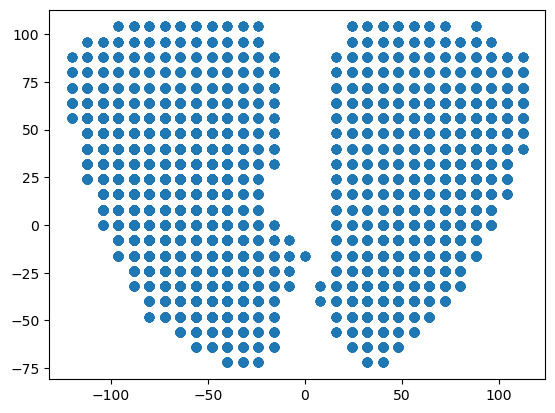

In [5]:
df=control[0]
df.columns=['Frame','SV','X','Y','Z']

plt.scatter(df['X'],df['Z'])

In [ ]:
dataframes=[]
for c in control:
    c.columns=['Frame','SV','X','Y','Z']
    dataframes.append([c,0])
for c in cf:
    c.columns=['Frame','SV','X','Y','Z']
    dataframes.append([c,1])

lbp=LBP_3DT(dataframes)

features=lbp.extract()



152 96 132
           0
0   0.004046
1   0.004624
2   0.024277
3   0.002312
4   0.016185
..       ...
59  0.001734
60  0.000578
61  0.000000
62  0.003468
63  0.000000

[64 rows x 1 columns]
           0         1
0   0.004046  0.006358
1   0.004624  0.004624
2   0.024277  0.015607
3   0.002312  0.004624
4   0.016185  0.015029
..       ...       ...
59  0.001734  0.003468
60  0.000578  0.000578
61  0.000000  0.002312
62  0.003468  0.004046
63  0.000000  0.000000

[64 rows x 2 columns]
           0         1         2
0   0.004046  0.006358  0.004046
1   0.004624  0.004624  0.007514
2   0.024277  0.015607  0.010405
3   0.002312  0.004624  0.001734
4   0.016185  0.015029  0.014451
..       ...       ...       ...
59  0.001734  0.003468  0.000000
60  0.000578  0.000578  0.000000
61  0.000000  0.002312  0.000000
62  0.003468  0.004046  0.002890
63  0.000000  0.000000  0.000000

[64 rows x 3 columns]
           0         1         2         3
0   0.004046  0.006358  0.004046  0.004046
1   0.

In [55]:

with open('file', 'rb') as fp:
    res = pickle.load(fp)

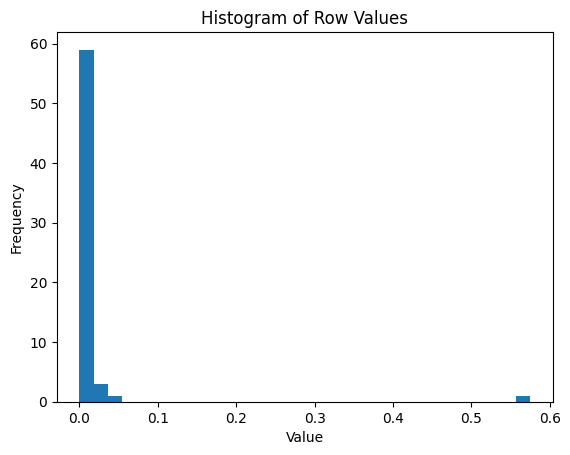

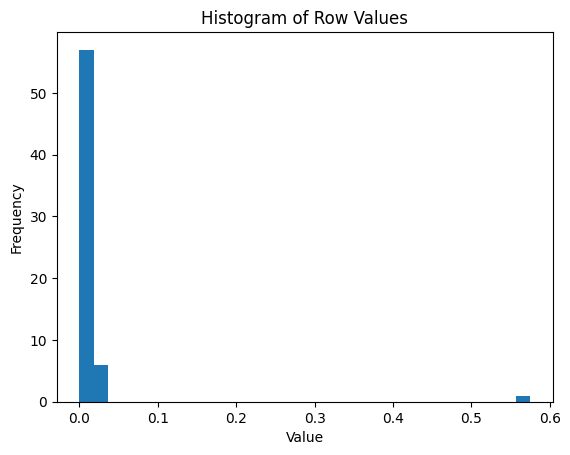

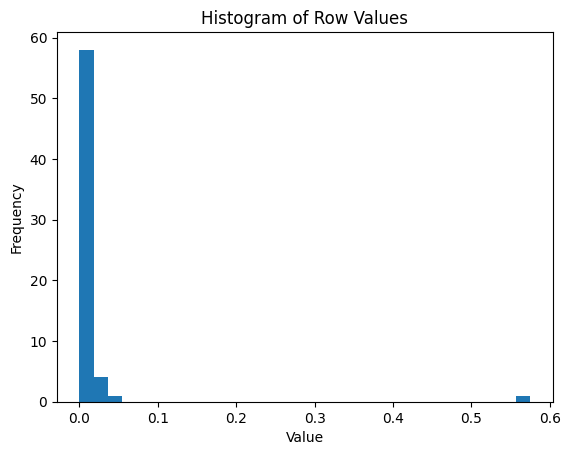

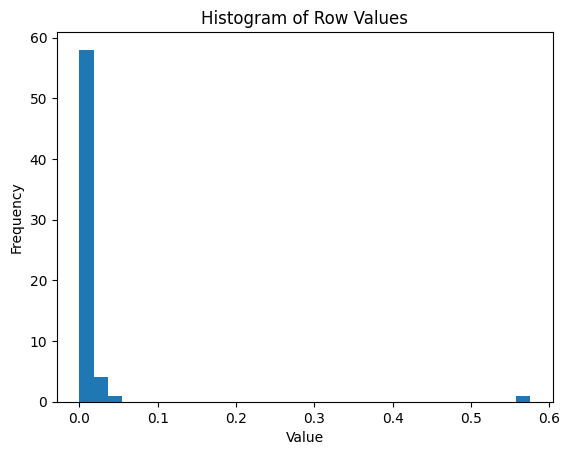

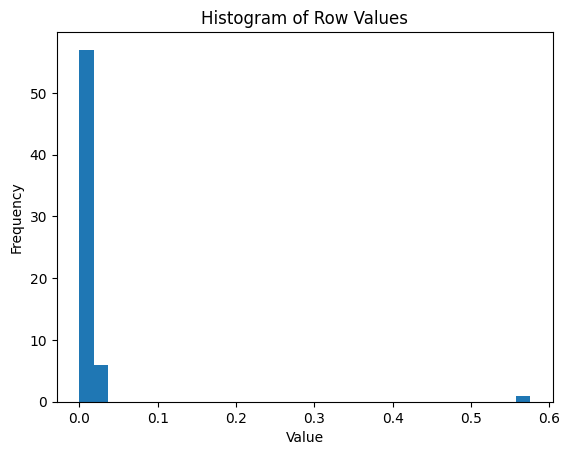

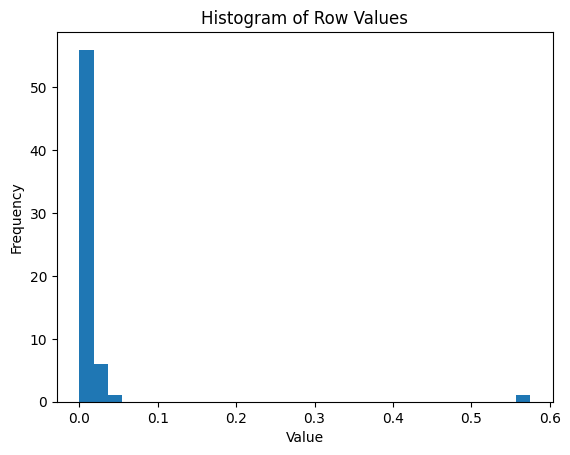

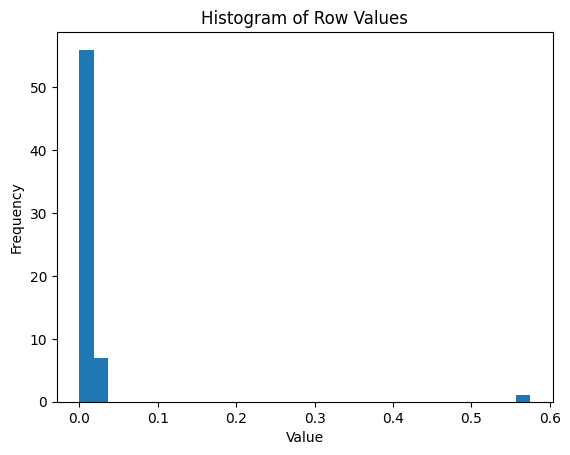

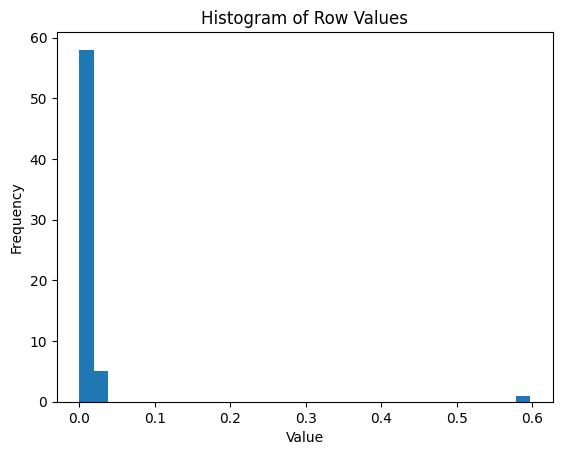

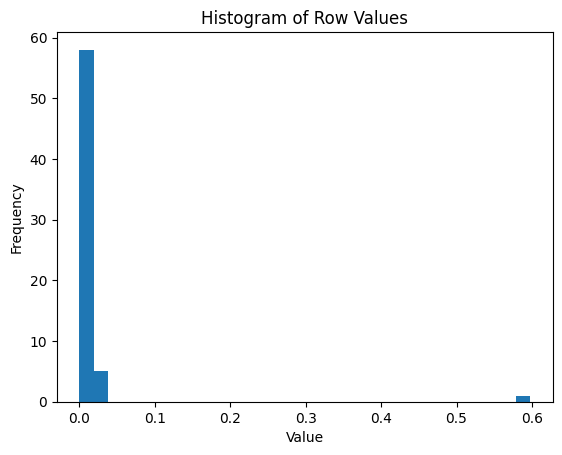

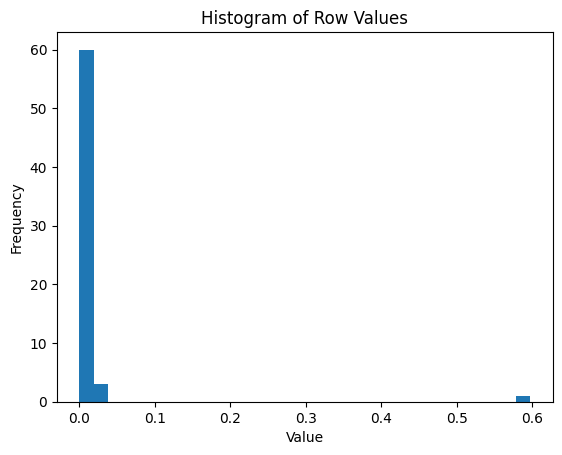

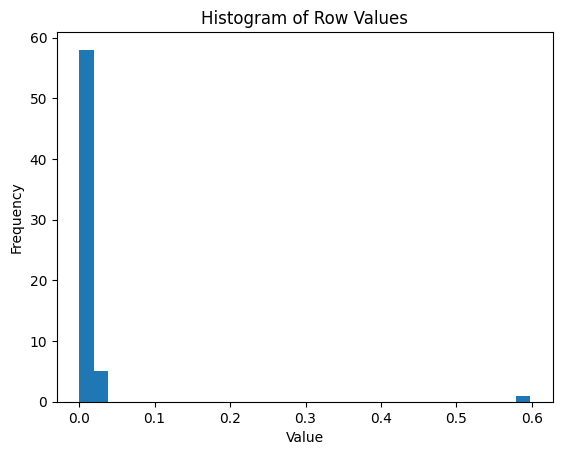

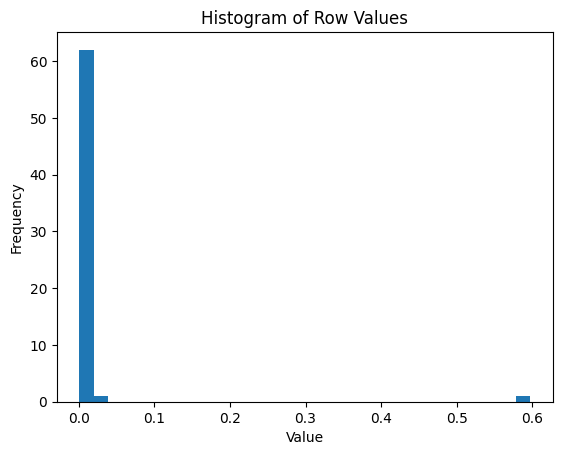

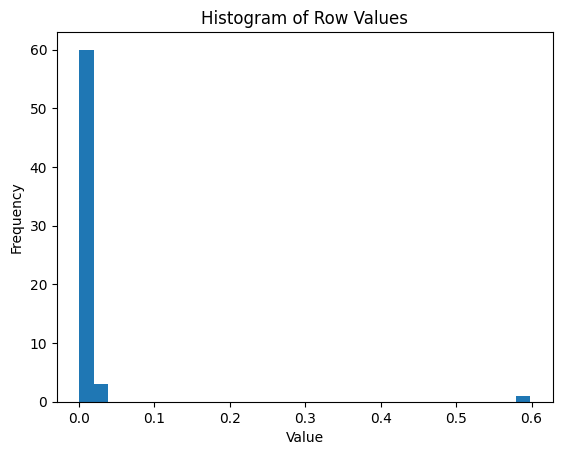

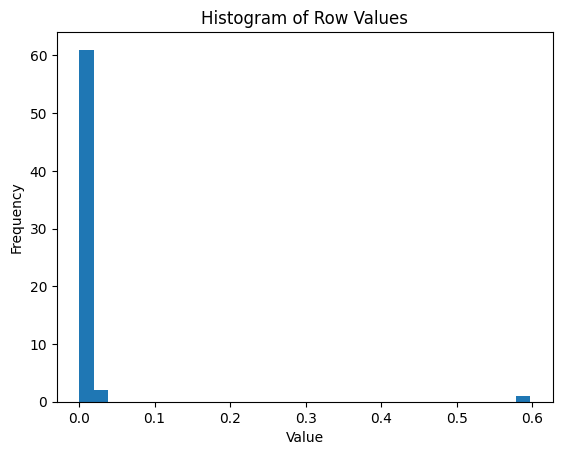

In [56]:

df=res[0][0]

df=df.T

for index,row in df.iterrows():
    plt.hist(row,bins=32)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Row Values')
    plt.show()


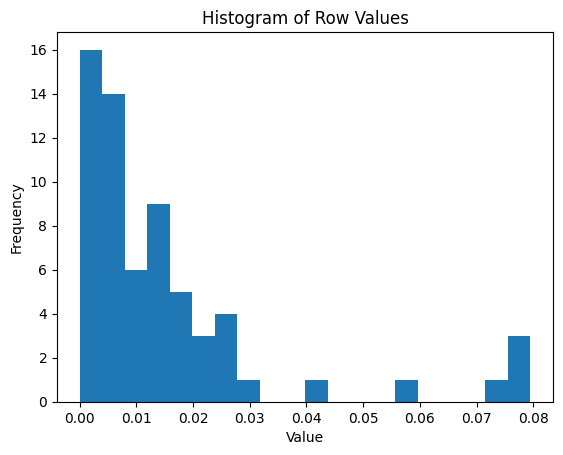

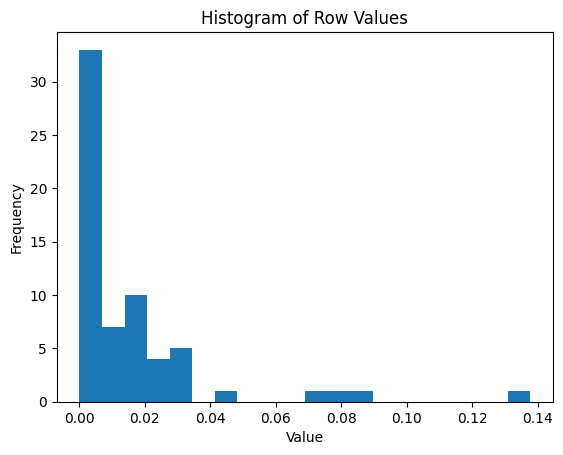

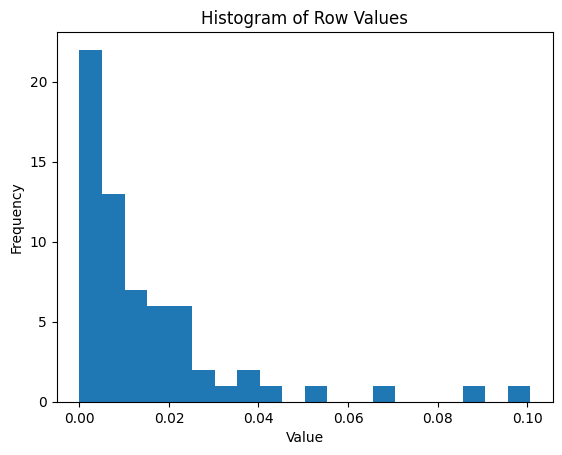

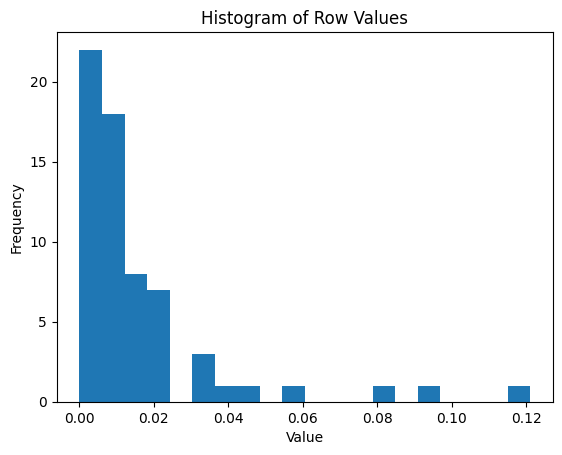

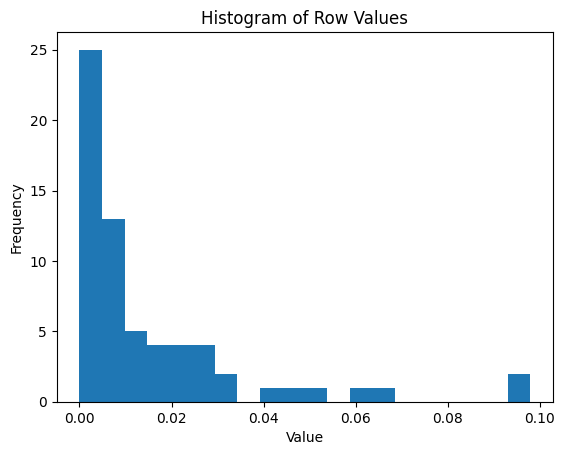

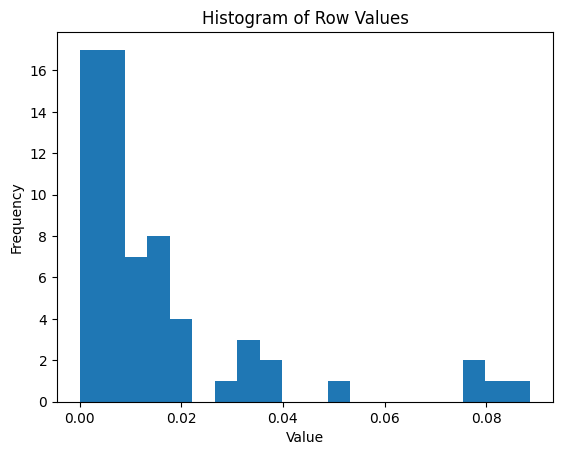

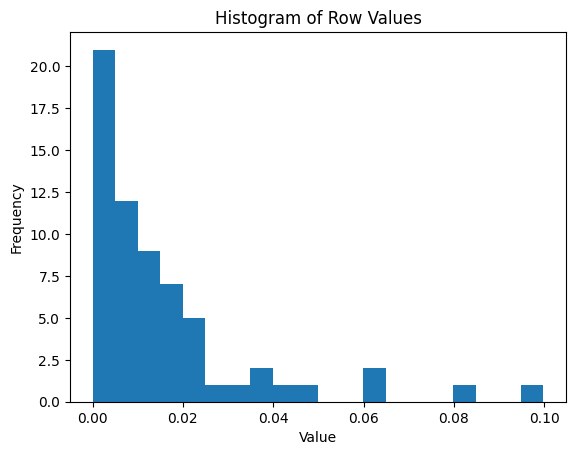

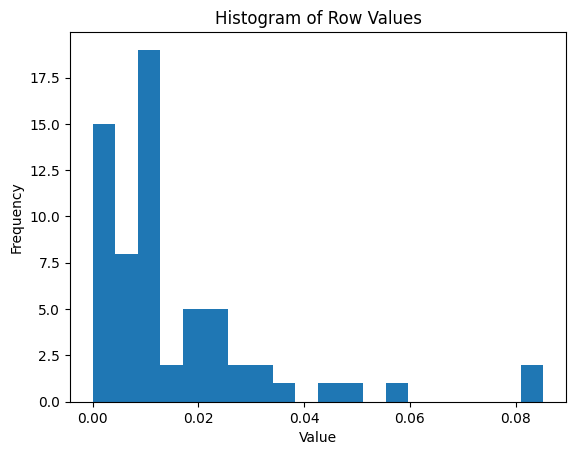

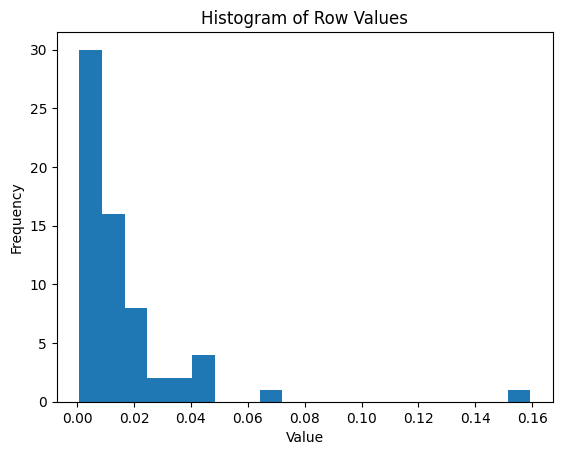

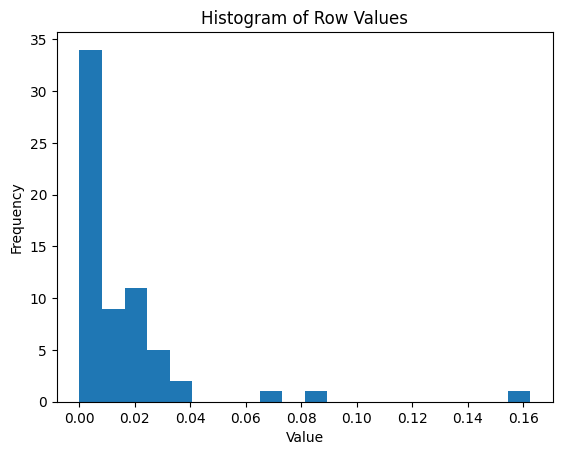

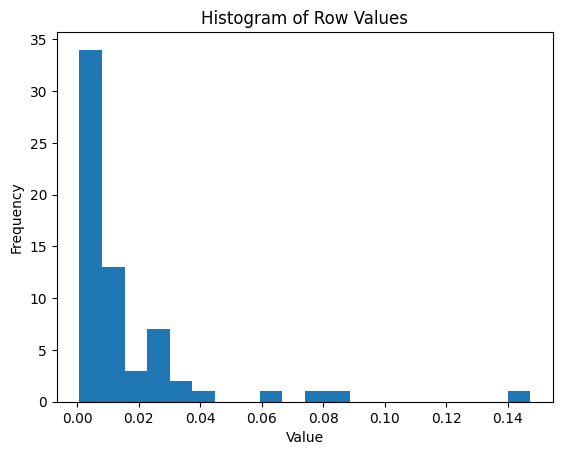

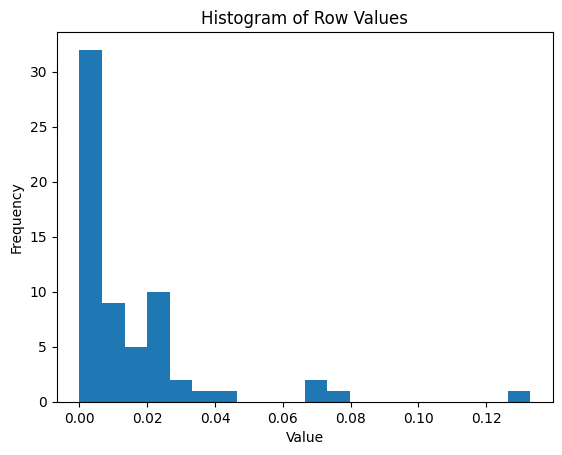

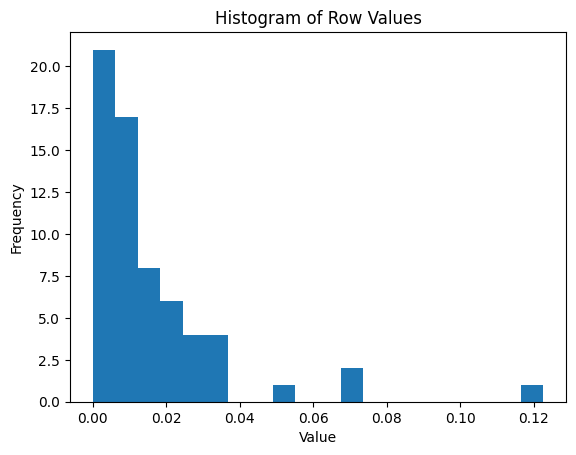

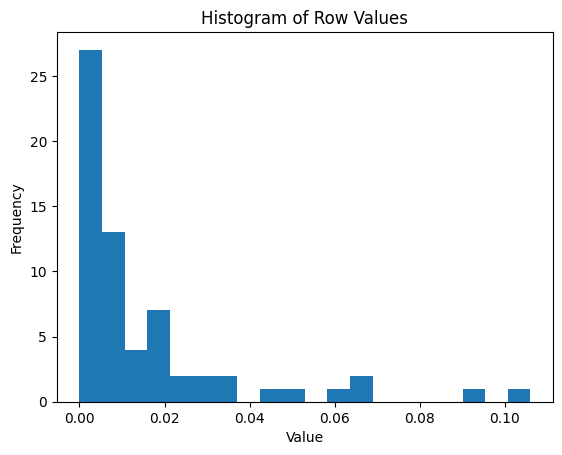

In [39]:

df=res[19][0]

df=df.T

for index,row in df.iterrows():
    plt.hist(row,bins=20)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Row Values')
    plt.show()



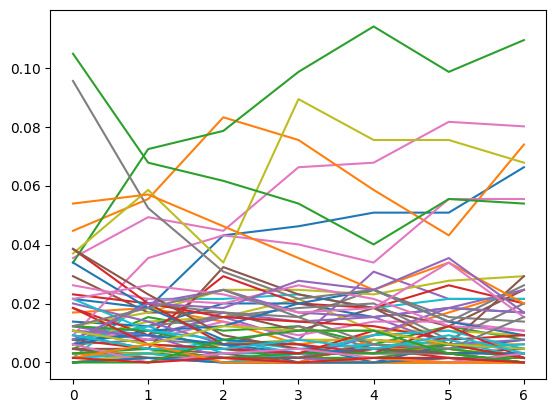

In [54]:
df=res[3][0]

for _,row in df.iterrows():
    plt.plot(row[:7])

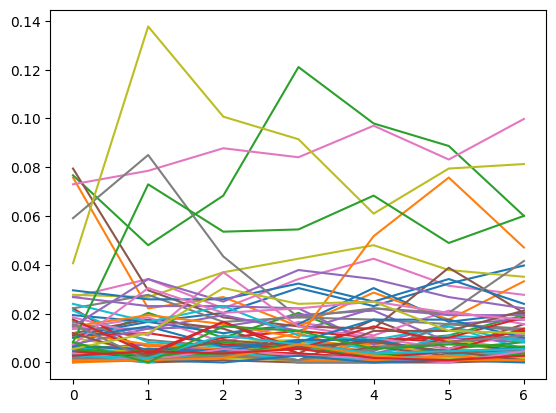

In [48]:
df=res[19][0]

for _,row in df.iterrows():
    plt.plot(row[:7])

1